In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("books_task.csv")

In [3]:
data.shape

(138724, 8)

In [4]:
data.columns

Index(['Unnamed: 0', 'Title', 'description', 'authors', 'publisher',
       'publishedDate', 'categories', 'Impact'],
      dtype='object')

In [5]:
data.head()

,Unnamed: 0,Title,description,authors,publisher,publishedDate,categories,Impact
0,0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],Smithsonian Institution,1996,['Comics & Graphic Novels'],784.303924
1,1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],825.465535
2,2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],OUP USA,2000,['Religion'],841.705321
3,3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,2005-02,['Fiction'],666.426542
4,5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996,['Religion'],806.216143


<Axes: >

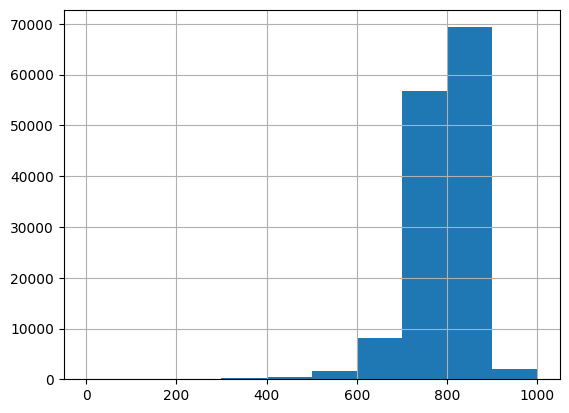

In [6]:
data["Impact"].hist()

In [7]:
def get_impact_group(x):
    try:
        x = float(x)
        if x < 500:
            return "<500"
        elif x <= 700:
            return "500-700"
        elif x <= 800:
            return "700-800"
        elif x <= 900:
            return "800-900"
        elif x <= 1000:
            return "900-1000"
    except Exception as e:
        return None

In [8]:
import re

def check_date_type(x):
    # Define regex patterns for different date formats
    yyyy_mm_dd_pattern = r'^\d{4}-\d{2}-\d{2}$'
    yyyy_mm_pattern = r'^\d{4}-\d{2}$'
    yyyy_pattern = r'^\d{4}$'
    try:
        # Check if the input matches any of the patterns
        if re.match(yyyy_mm_dd_pattern, x):
            return "YYYY-MM-DD"
        elif re.match(yyyy_mm_pattern, x):
            return "YYYY-MM"
        elif re.match(yyyy_pattern, x):
            return "YYYY"
        else:
            return "Unknown"
    except Exception as e:
        return "Error"

In [9]:
def get_published_year(y):
    x = check_date_type(y)
    #import pdb;pdb.set_trace();
    try:
        if x == "YYYY-MM-DD":
            return y[0:4]
        elif x == "YYYY":
            return y[0:4]
        elif x == "YYYY-MM":
            return y[0:4]
        else:
            return None
    except Exception as e:
        print(e)
        return None

In [10]:
data["impact_group"] = data["Impact"].apply(get_impact_group)

In [21]:
pd.pivot_table(data[data["publisher"] == "Wm. B. Eerdmans Publishing"],
               index = "publisher",
               columns = "impact_group",
               aggfunc = {"Title":"count"}
              )

Title                         
impact_group               500-700 700-800 800-900 900-1000
publisher                                                  
Wm. B. Eerdmans Publishing       3     115    2442        3

In [14]:
data["publisher"].value_counts()[0:10]

publisher
Tan Books & Pub               3635
Simon and Schuster            3600
Smithsonian Institution       3216
Penguin                       2788
Wm. B. Eerdmans Publishing    2563
Routledge                     2371
John Wiley & Sons             1984
Harper Collins                1959
Cambridge University Press    1478
A&C Black                     1355
Name: count, dtype: int64

In [37]:
data["authors"].value_counts()[0:50]

authors
['Rose Arny']                                236
['Library of Congress. Copyright Office']    164
["Louis L'Amour"]                            109
['William Shakespeare']                      103
['Agatha Christie']                          100
['Erle Stanley Gardner']                      61
['Ann M. Martin']                             61
['Carolyn Keene']                             60
['Edgar Rice Burroughs']                      58
['Various']                                   56
['DK']                                        55
['John Steinbeck']                            51
['Rudyard Kipling']                           51
['Nora Roberts']                              51
['Mark Twain']                                49
['Georgette Heyer']                           48
['Zane Grey']                                 45
['C. S. Lewis']                               42
['Henry James']                               41
['Stephen King']                              41
['Franklin W

In [39]:
pd.pivot_table(data[data["authors"] == "[\"Patrick O'Brian\"]"],
               index = "authors",
               columns = "impact_group",
               aggfunc = {"Title":"count"}
              )

Title                         
impact_group        500-700 700-800 800-900 900-1000
authors                                             
["Patrick O'Brian"]       4      10      14        2

In [40]:
data[data["Impact"] > 900]

,Unnamed: 0,Title,description,authors,publisher,publishedDate,categories,Impact,impact_group
55,73,Night World: Daughters Of Darkness,"""There’s something strange about the new girls...",['L.J. Smith'],Simon and Schuster,2016-12-06,['Juvenile Fiction'],934.280289,900-1000
177,257,Thomas Paine : Collected Writings : Common Sen...,Thomas Paine was the impassioned democratic vo...,['Thomas Paine'],Library of America,1995-03-01,['History'],908.200182,900-1000
265,384,The New Revised Standard Version Bible with Ap...,Though they are regularly used in both Protest...,['Hendrickson Publishers'],Hendrickson Publishers,2005-08,['Bibles'],908.272981,900-1000
293,429,Dr. Bernstein's Diabetes Solution: The Complet...,"Originally published in 1997, DR. BERNSTEIN'S ...",['Richard K. Bernstein'],Hachette UK,2011-11-01,['Health & Fitness'],908.711288,900-1000
295,432,Stopped at Stalingrad: The Luftwaffe and Hitle...,A case study in combined arms warfare that fil...,['Joel S. A. Hayward'],Library of America,1998,['History'],918.518071,900-1000
...,...,...,...,...,...,...,...,...,...
138518,211915,"Mayo Clinic Family Health Book, Third Edition",Drawing upon the research and expertise of mor...,['Scott C. Litin'],Mayo Clinic Press,2018-05-29,['Health & Fitness'],901.075719,900-1000
138554,211993,Basketball - Multiple Offense and Defense,Explains how coaches can help their players de...,"['Dean Smith', 'Bob Spear']",Benjamin-Cummings Publishing Company,1999,['Sports & Recreation'],904.782994,900-1000
138563,212015,YogaKids: Educating the Whole Child Through Yoga,The innovative YogaKids® program offers more t...,['Marsha Wenig'],Abrams,2015-01-01,['Health & Fitness'],900.289363,900-1000
138580,212050,How To Become an Employer of Choice,Competition among employers is fierce with man...,"['Roger E. Herman', 'Joyce Leah Gioia']",Oak Hill Publishing Company,2000-01-01,['Business & Economics'],904.490023,900-1000


In [41]:
pd.pivot_table(data,
               index = "categories",
               columns = "impact_group",
               aggfunc = {"Title":"count"}
              )

Title                              
impact_group               500-700 700-800 800-900 900-1000 <500
categories                                                      
["Children's literature"]      2.0    41.0    60.0      4.0  NaN
["Children's stories"]         5.0    91.0   149.0      7.0  NaN
['Adventure stories']          2.0    50.0    66.0      4.0  NaN
['African Americans']          3.0    70.0   111.0      1.0  NaN
['American fiction']           8.0    73.0    57.0      1.0  NaN
...                            ...     ...     ...      ...  ...
['True Crime']                69.0   155.0   135.0      5.0  8.0
['United States']             17.0   165.0   202.0      2.0  1.0
['World War, 1939-1945']       6.0    83.0    94.0      NaN  NaN
['Young Adult Fiction']       54.0   221.0   296.0     15.0  9.0
['Young Adult Nonfiction']     NaN    28.0    48.0      3.0  NaN

[100 rows x 5 columns]

In [42]:
data["authors"].nunique()

97801

In [44]:
data["publisher"].nunique()

12855

In [45]:
data["categories"].nunique()

100